In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gsw

In [3]:
path = 'averagedRuns/'



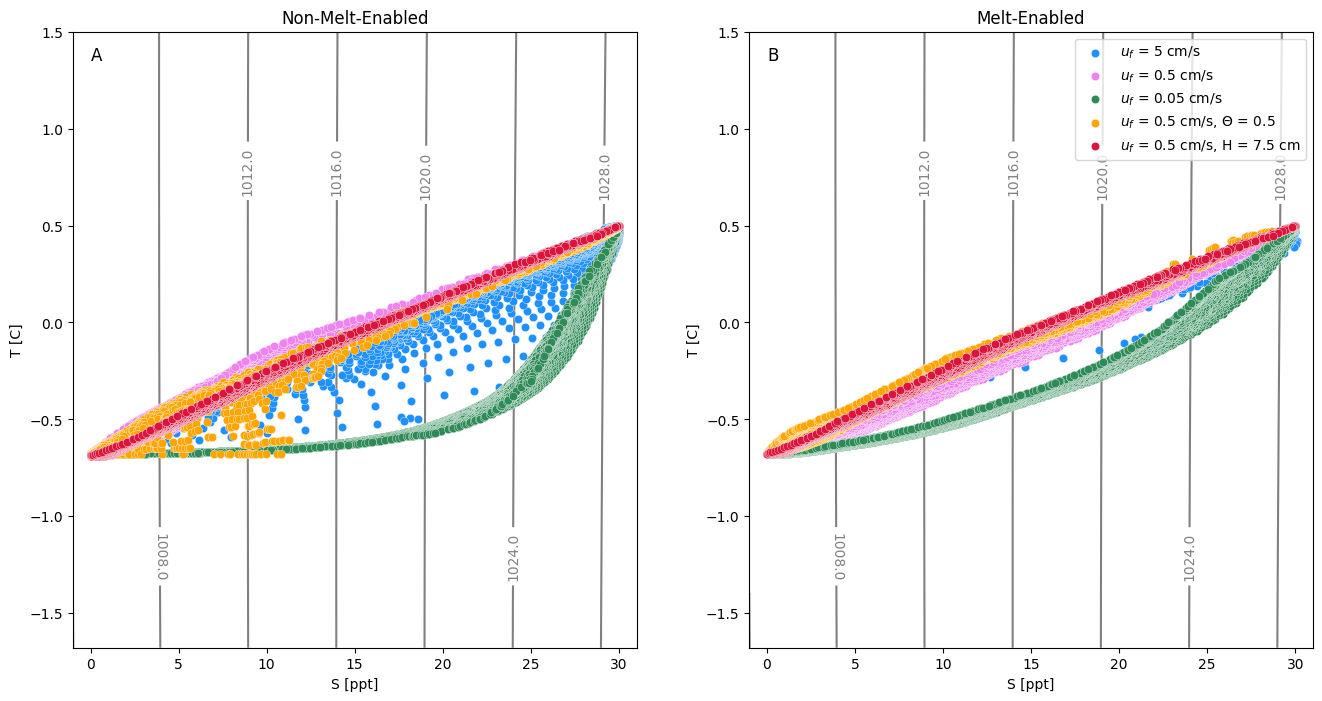

In [19]:
files = ['f1cu2_ys_body.csv', 'f2cu2_ys_body.csv', 'f3cu2_ys_body.csv',  'f4cu2_theta1_body.csv', 'f5cu2_ys_body.csv']
colors = ['dodgerblue', 'violet', 'seagreen', 'orange', 'crimson']
f2cu2_intru = 4.78
f1cu2_intru = 0.49
f3cu2_intru = 23.95
f4cu2_theta1_intru = 7.77
f5cu2_intru = 12.95

intrus = [f1cu2_intru, f2cu2_intru, f3cu2_intru, f4cu2_theta1_intru, f5cu2_intru]
skips = [1, 20, 50, 20, 50]
labels = ['$u_f$ = 5 cm/s', '$u_f$ = 0.5 cm/s', '$u_f$ = 0.05 cm/s', '$u_f$ = 0.5 cm/s, $\Theta$ = 0.5', '$u_f$ = 0.5 cm/s, H = 7.5 cm']

i = 0
fig,ax=plt.subplots(1, 2, figsize=(16,8))

for each in files:
    df = pd.read_csv(path + each)
    intru = intrus[i] + 2 #23.95
    a = df
    b = a.iloc[np.where(a.x > 2)[0],:]
    c = b.iloc[np.where(b.x < intru)[0],:]
    d = c.iloc[np.where(c.y < 0.045)[0], :]
    df = d

    skip  = skips[i]
    ax[0].scatter(df.avgSalt.iloc[::skip] * 1000 , df.avgTemp.iloc[::skip] - 273.15, color = colors[i], edgecolor = 'white', linewidth = 0.25, label = labels[i], zorder = 2)

    i = i + 1

i = 0
files = ['f1cu2_m_ys_body.csv', 'f2cu2_m_ys_body.csv', 'f3cu2_ys_m_body.csv',  'f4cu2_theta1_m_body.csv', 'f5cu2_m_body.csv']
for each in files:
    df = pd.read_csv(path + each)
    intru = intrus[i] + 2 #23.95
    a = df
    b = a.iloc[np.where(a.x > 2)[0],:]
    c = b.iloc[np.where(b.x < intru)[0],:]
    d = c.iloc[np.where(c.y < 0.045)[0], :]
    df = d

    skip  = skips[i]
    ax[1].scatter(df.avgSalt.iloc[::skip] * 1000 , df.avgTemp.iloc[::skip] - 273.15, color = colors[i], edgecolor = 'white', linewidth = 0.25, label = labels[i], zorder = 2)

    i = i + 1

mint=np.min(df.avgTemp) - 273.15
maxt=np.max(df.avgTemp) - 273.15

mins=np.min(df.avgSalt) * 1000
maxs=np.max(df.avgSalt) * 1000

tempL=np.linspace(mint-1,maxt+1,156)

salL=np.linspace(mins-1,maxs+1,156)

for i in range(0, 2):

    Tg, Sg = np.meshgrid(tempL,salL)
    sigma_theta = gsw.rho(Sg, Tg, 1000)
    cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
    cs = ax[i].contour(Sg, Tg, sigma_theta, colors='grey', zorder=1)
    cl=plt.clabel(cs,fontsize=10,inline=True,fmt='%.1f')

    ax[i].set_ylabel('T [C]'); ax[i].set_xlabel('S [ppt]')
    ax[i].set_xlim(-1, 31)

ax[0].text(0,1.35, "A", fontsize = 12); ax[1].text(0,1.35, "B", fontsize = 12)
ax[0].set_title('Non-Melt-Enabled'); ax[1].set_title('Melt-Enabled')
plt.legend()
plt.savefig('TS_diagram.png', dpi = 500)